<a href="https://colab.research.google.com/github/feliperecker/MVP/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP

### Relação entre estilo de vida e saúde mental

**Nome:** Felipe Coelho Recker Rabello

**Dataset:** [Mental Health & Technology Usage Dataset](https://www.kaggle.com/datasets/waqi786/mental-health-and-technology-usage-dataset)

## Introdução

Nessa etapa faremos as primeiras verificações do dataset e o problema que buscamos analisar

### Descrição do Problema

A crescente preocupação com a saúde mental em um contexto de intensificação do uso de tecnologias e mudanças no estilo de vida levanta questionamentos sobre como fatores comportamentais impactam o bem-estar psicológico. Este projeto tem como objetivo investigar a relação entre aspectos do estilo de vida, como horas de sono, prática de atividade física, uso de redes sociais e níveis de estresse com o estado de saúde mental dos indivíduos, identificando padrões e possíveis correlações que possam subsidiar estratégias de prevenção e promoção da saúde mental.

### Tipo de Problema

Este é um problema de classificação supervisionada. Dado um conjunto de características relacionadas ao estilo de vida dos indivíduos.

### Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Pessoas que dormem menos horas por dia tendem a apresentar pior estado de saúde mental?

- Níveis mais elevados de atividade física diária estão associados a melhores condições de saúde mental?

- Indivíduos com maior uso diário de redes sociais apresentam níveis mais altos de estresse?

- A combinação de poucas horas de sono e baixa atividade física agrava negativamente a saúde mental?

- Altas horas de tempo de tela estão associadas a menor qualidade de sono e aumento do estresse?

### Seleção de Dados

O dataset foi selecionado por conter informações relevantes sobre hábitos diários de uso de tecnologia, redes sociais, sono, atividade física e saúde mental. Ele oferece uma base rica para investigar como aspectos do estilo de vida influenciam o bem-estar psicológico, permitindo análises exploratórias, correlações e construção de modelos preditivos relacionados à saúde mental.

### Atributos do Dataset

O dataset Mental Health & Technology Usage 2024 contém 10.000 amostras de indivíduos, abrangendo dados sobre estilo de vida, uso de tecnologia e indicadores de saúde mental. Possui 14 colunas:

- **User_ID** (identificador único de cada participante)
- **Age** (idade do indivíduo)
- **Gender** (gênero do indivíduo: Male, Female, Other)
- **Technology_Usage_Hours** (horas diárias usando dispositivos tecnológicos)
- **Social_Media_Usage_Hours** (horas diárias em redes sociais)
- **Gaming_Hours** (horas diárias dedicadas a jogos eletrônicos)
- **Screen_Time_Hours** (tempo total de tela por dia)
- **Mental_Health_Status** (condição geral de saúde mental: Poor, Fair, Good, Excellent)
- **Stress_Level** (nível de estresse percebido: Low, Medium, High)
- **Sleep_Hours** (quantidade média de horas de sono por dia)
- **Physical_Activity_Hours** (horas diárias de atividade física)
- **Support_Systems_Access** (acesso a redes de apoio social: Yes ou No)
- **Work_Environment_Impact** (percepção do impacto do ambiente de trabalho: Positive ou Negative)
- **Online_Support_Usage** (uso de plataformas de suporte online: Yes ou No)

## Configuração Inicial e Carregamento do Dataset

Nessa etapa, realizamos os procedimentos iniciais para preparação da análise dos dados. Assim, podemos ter uma visão geral da estrutura e dos tipos de dados disponíveis.

### Importação de Bibliotecas

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis

### Carga do Dataset

Este código carrega o dataset diretamente de uma URL e exibe uma amostra inicial para inspeção.

In [ ]:
# Informa a URL de importação do dataset
df = "https://raw.githubusercontent.com/feliperecker/MVP/refs/heads/main/mental_health.csv"

# Lê o arquivo
df = pd.read_csv(df, delimiter=',')

# Mostra as primeiras linhas do dataset
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


Essa tabela mostra os primeiros registros do dataset

## Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset `Mental Health & Technology Usage, 2024` buscamos compreender a distribuição das variáveis, identificar padrões e possíveis correlações entre hábitos de vida e saúde mental. Essa análise é essencial para orientar as etapas seguintes de pré-processamento, formulação de hipóteses e construção de modelos preditivos.

### Total e Tipo das Instâncias

O dataset `Mental Health & Technology Usage 2024` possui 10.000 instâncias (observações), cada uma representando um indivíduo com informações sobre estilo de vida, uso de tecnologia e indicadores de saúde mental. Das 14 variáveis, 6 são numéricas (como horas de sono, atividade física e uso de tecnologia) e 8 são categóricas, incluindo atributos como gênero, nível de estresse, saúde mental e acesso a suporte social.

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 10000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_

A tabela acima mostra que todas as colunas da tabela estão completas, sem registros nulos. Além disso, a tabela evidencia que o tipo dos dados varia entre `float`, `object` e `int`

### Distribuição dos atributos

O código abaixo utiliza um gráfico de barras para visualizar a distribuição das categorias da coluna Mental_Health_Status. Com isso, é possível identificar quais estados de saúde mental são mais frequentes na base de dados, facilitando a compreensão do equilíbrio entre as classes para futuras análises ou modelagens.

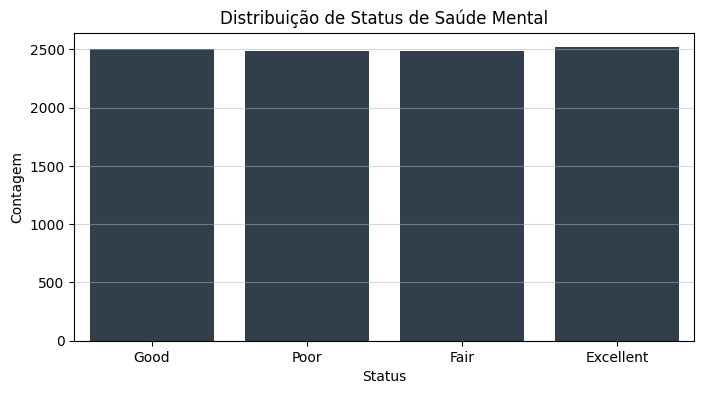

In [ ]:
plt.figure(figsize=(8, 4))
# gráfico de barras simples
sns.countplot(x='Mental_Health_Status', data=df, color='#2C3E50')
plt.title('Distribuição de Status de Saúde Mental')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

O gráfico de barras mostra a distribuição das categorias da variável Mental_Health_Status, indicando que os quatro níveis de saúde mental (Poor, Fair, Good e Excellent) estão equilibrados em termos de frequência, cada um com aproximadamente 2.500 observações. Isso sugere que o dataset é bem balanceado em relação à variável-alvo, o que é positivo para tarefas de classificação, pois evita o viés do modelo para uma classe dominante.

### Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
df.describe()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


A tabela acima apresenta um resumo estatístico das variáveis numéricas do dataset. Podemos observar que a média de idade dos participantes é de aproximadamente 41 anos, com uma boa distribuição entre jovens e adultos. O tempo médio de uso de tecnologia é elevado, girando em torno de 6,4 horas por dia, com destaque para o tempo de tela, que chega a quase 8 horas diárias em média. O uso de redes sociais e jogos varia bastante entre os indivíduos. Em relação ao estilo de vida, a média de sono é de 6,5 horas por dia (abaixo do recomendado, que é entre 7h - 9h) e a atividade física apresenta ampla variação, indo de 0 a 10 horas por dia. Esses dados iniciais indicam padrões de comportamento que podem estar diretamente relacionados à saúde mental dos participantes.

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
Age,41.518600
Technology_Usage_Hours,6.474341
Social_Media_Usage_Hours,3.972321
Gaming_Hours,2.515598
Screen_Time_Hours,7.975765
Sleep_Hours,6.500724
Physical_Activity_Hours,5.003860


A seguir, visualizamos a média das variáveis numéricas relacionadas ao estilo de vida, desconsiderando a idade.

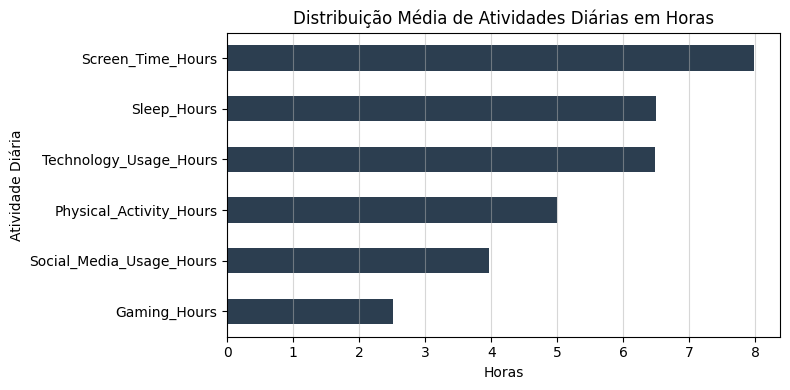

In [ ]:
# Extrair as médias e remover a variável 'Age'
means = df.describe().loc['mean'].drop('Age')

# Plotar gráfico de barras horizontal
plt.figure(figsize=(8, 4))
means.sort_values().plot(kind='barh', color='#2C3E50')

plt.title('Distribuição Média de Atividades Diárias em Horas')
plt.xlabel('Horas')
plt.ylabel('Atividade Diária')
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Com esse gráfico, observa-se que o tempo de tela apresenta a maior média, praticamente em 8 horas por dia, seguido pelas horas de sono e de uso geral da tecnologia, ambos com valores médios acima de 6 horas. A atividade física também se destaca com uma média razoável de 5 horas, enquanto o uso de redes sociais e o tempo dedicado a jogos aparecem com médias mais baixas. Esses dados indicam uma rotina altamente conectada, em que o tempo médio de exposição a telas supera até mesmo as horas de sono, o que pode ter impactos significativos no bem-estar físico e mental.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Age,13.920217
Technology_Usage_Hours,3.169022
Social_Media_Usage_Hours,2.313707
Gaming_Hours,1.446748
Screen_Time_Hours,4.042608
Sleep_Hours,1.450933
Physical_Activity_Hours,2.905044


A seguir, visualizamos o desvio padrão das variáveis numéricas relacionadas ao estilo de vida, desconsiderando a idade.

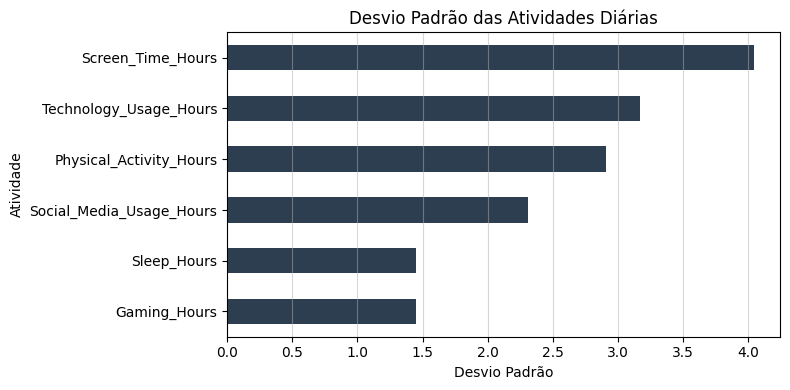

In [ ]:
# Extrair os desvios padrão e remover 'Age' se desejado
stds = df.describe().loc['std'].drop('Age')

# Plotar gráfico de barras horizontal
plt.figure(figsize=(8, 4))
stds.sort_values().plot(kind='barh', color='#2C3E50')

plt.title('Desvio Padrão das Atividades Diárias')
plt.xlabel('Desvio Padrão')
plt.ylabel('Atividade')
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

O gráfico evidencia que a variável `Screen_Time_Hours` apresenta o maior desvio
padrão entre as atividades analisadas, indicando grande variação no tempo de exposição às telas entre os participantes. Em seguida, `Technology_Usage_Hours` e `Physical_Activity_Hours` também mostram alta dispersão, o que sugere hábitos bastante distintos de uso de tecnologia e prática de exercícios físicos. Por outro lado, variáveis como `Sleep_Hours` e `Gaming_Hours` têm desvio padrão mais baixo, indicando que a maioria dos participantes tende a seguir padrões semelhantes nessas atividades. Essa análise é importante para identificar quais variáveis podem ter maior peso na segmentação ou previsão da saúde mental, devido à sua diversidade comportamental.

### Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

#### *Sleep_Hours*

Para investigar se existe alguma diferença nos padrões de sono entre os grupos com diferentes níveis de saúde mental, foi construído um gráfico comparando a distribuição das horas de sono entre indivíduos com saúde mental mais fragilizada (Poor e Fair) e aqueles com saúde mental mais positiva (Good e Excellent). O objetivo é observar visualmente se há variações significativas entre os grupos, o que pode indicar uma possível associação entre quantidade de sono e o estado geral de bem-estar psicológico.

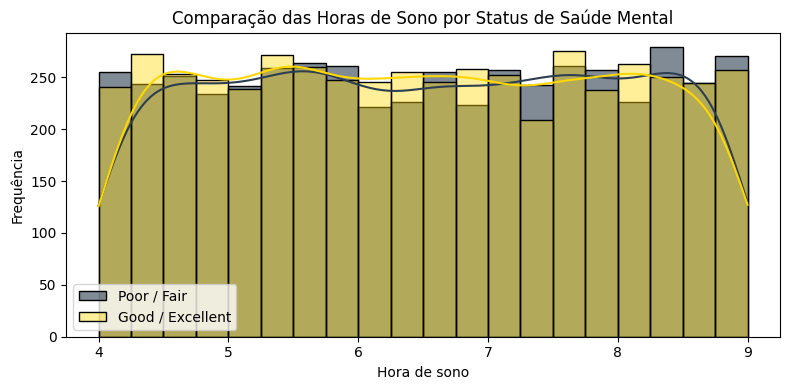

In [ ]:
plt.figure(figsize=(8, 4))

# Dados filtrados por grupo
grupo_baixo = df[df['Mental_Health_Status'].isin(['Poor', 'Fair'])]['Sleep_Hours']
grupo_alto = df[df['Mental_Health_Status'].isin(['Good', 'Excellent'])]['Sleep_Hours']

# Plot dos dois histogramas
sns.histplot(grupo_baixo, kde=True, color='#2C3E50', label='Poor / Fair', stat='count', bins=20, edgecolor='black', alpha=0.6)
sns.histplot(grupo_alto, kde=True, color='gold', label='Good / Excellent', stat='count', bins=20, edgecolor='black', alpha=0.4)

plt.title('Comparação das Horas de Sono por Status de Saúde Mental')
plt.xlabel('Hora de sono')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

O histograma comparativo mostra que, apesar da expectativa de que mais horas de sono estariam associadas a uma melhor saúde mental, o gráfico revela que tanto indivíduos com saúde mental fragilizada (Poor e Fair) quanto aqueles com saúde mental positiva (Good e Excellent) apresentam distribuições muito semelhantes de horas de sono. Ambos os grupos se concentram majoritariamente entre 6 e 8 horas por noite, o que indica que a quantidade de sono isoladamente pode não ser um fator determinante para diferenciar os níveis de saúde mental nesta amostra. Esse resultado sugere que outros fatores podem exercer maior influência sobre o bem-estar psicológico do que apenas a duração do sono em si.

Para complementar a análise visual do histograma e obter uma visão mais precisa da forma da distribuição, vamos calcular duas métricas estatísticas importantes: assimetria (skewness) e curtose (kurtosis). A assimetria nos informa se a distribuição tende para algum dos lados (direita ou esquerda), enquanto a curtose indica o grau de concentração dos dados em torno da média e a presença de valores extremos. O código abaixo realiza esses cálculos para a variável Sleep_Hours:

In [ ]:
# Filtrar os dois grupos
grupo_baixo = df[df['Mental_Health_Status'].isin(['Poor', 'Fair'])]['Sleep_Hours']
grupo_alto = df[df['Mental_Health_Status'].isin(['Good', 'Excellent'])]['Sleep_Hours']

# Calcular skewness e kurtosis para cada grupo
skew_baixo = skew(grupo_baixo)
kurt_baixo = kurtosis(grupo_baixo)

skew_alto = skew(grupo_alto)
kurt_alto = kurtosis(grupo_alto)

# Exibir os resultados
print("Grupo: Poor / Fair")
print(f"  Skewness: {skew_baixo:.4f}")
print(f"  Kurtosis: {kurt_baixo:.4f}")

print("\nGrupo: Good / Excellent")
print(f"  Skewness: {skew_alto:.4f}")
print(f"  Kurtosis: {kurt_alto:.4f}")

Grupo: Poor / Fair
  Skewness: -0.0092
  Kurtosis: -1.2178

Grupo: Good / Excellent
  Skewness: 0.0171
  Kurtosis: -1.2063


A análise estatística das distribuições de horas de sono nos dois grupos de saúde mental (Poor/Fair e Good/Excellent) revela resultados bastante semelhantes. Os valores de skewness foram próximos de zero para ambos os grupos, indicando que as distribuições são praticamente simétricas, sem caudas acentuadas à esquerda ou à direita. Já os valores de kurtosis foram negativos e muito parecidos entre si, sugerindo distribuições mais achatadas do que uma distribuição normal. Isso significa que os dados estão mais espalhados, com menos concentração em torno da média, evidenciando também que podemos classificar os dados como simétricas e Unimodais nos dois grupos. Com isso, esses resultados reforçam o que já havia sido observado visualmente nos histogramas: a quantidade de sono, por si só, não parece ser um fator que distingue claramente os grupos com saúde mental positiva ou fragilizada.

#### *Screen_Time_Hours*

Dando continuidade à análise do estilo de vida dos participantes, o próximo aspecto observado é o tempo diário de exposição a telas, representado pela variável `Screen_Time_Hours`. Assim como o sono, esse fator pode influenciar diretamente na saúde mental, especialmente em contextos de uso excessivo de dispositivos eletrônicos. Através do histograma a seguir, busca-se compreender como esse comportamento está distribuído entre os indivíduos da base de dados e se há alguma tendência clara que possa ser posteriormente associada ao bem-estar psicológico.

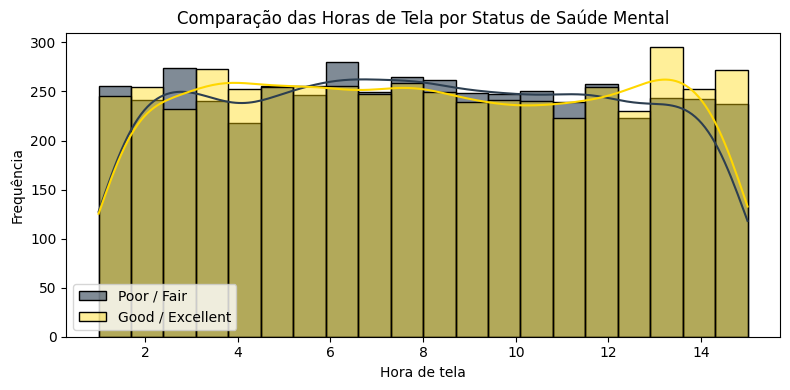

In [ ]:
plt.figure(figsize=(8, 4))

# Dados filtrados por grupo
grupo_baixo = df[df['Mental_Health_Status'].isin(['Poor', 'Fair'])]['Screen_Time_Hours']
grupo_alto = df[df['Mental_Health_Status'].isin(['Good', 'Excellent'])]['Screen_Time_Hours']

# Plot dos dois histogramas
sns.histplot(grupo_baixo, kde=True, color='#2C3E50', label='Poor / Fair', stat='count', bins=20, edgecolor='black', alpha=0.6)
sns.histplot(grupo_alto, kde=True, color='gold', label='Good / Excellent', stat='count', bins=20, edgecolor='black', alpha=0.4)

plt.title('Comparação das Horas de Tela por Status de Saúde Mental')
plt.xlabel('Hora de tela')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

Ao analisar a distribuição das horas de tela entre os grupos com diferentes níveis de saúde mental, observa-se que ambos os perfis (Poor/Fair e Good/Excellent) apresentam padrões bastante semelhantes. O tempo diário de exposição a telas está amplamente distribuído entre 1 e 15 horas, sem concentração clara em nenhuma faixa específica. As curvas de densidade reforçam essa percepção, indicando que esse hábito está presente de forma generalizada, independentemente do estado de saúde mental. Curiosamente, o grupo com melhor saúde mental apresenta uma leve elevação nas faixas mais altas de tempo de tela, o que sugere que a quantidade de horas em frente a dispositivos, isoladamente, pode não ser um bom preditor de bem-estar psicológico. Esse resultado indica que fatores como o tipo de atividade realizada durante o uso da tela (ex.: trabalho, estudo, entretenimento) ou o contexto emocional associado a esse uso podem ser mais relevantes do que o tempo absoluto.

Para complementar a análise visual do histograma e obter uma visão mais precisa da forma da distribuição, vamos calcular as métricas estatísticas de assimetria (skewness) e curtose (kurtosis).

In [ ]:
# Filtrar os dois grupos
grupo_baixo = df[df['Mental_Health_Status'].isin(['Poor', 'Fair'])]['Sleep_Hours']
grupo_alto = df[df['Mental_Health_Status'].isin(['Good', 'Excellent'])]['Sleep_Hours']

# Calcular skewness e kurtosis para cada grupo
skew_baixo = skew(grupo_baixo)
kurt_baixo = kurtosis(grupo_baixo)

skew_alto = skew(grupo_alto)
kurt_alto = kurtosis(grupo_alto)

# Exibir os resultados
print("Grupo: Poor / Fair")
print(f"  Skewness: {skew_baixo:.4f}")
print(f"  Kurtosis: {kurt_baixo:.4f}")

print("\nGrupo: Good / Excellent")
print(f"  Skewness: {skew_alto:.4f}")
print(f"  Kurtosis: {kurt_alto:.4f}")

Grupo: Poor / Fair
  Skewness: -0.0092
  Kurtosis: -1.2178

Grupo: Good / Excellent
  Skewness: 0.0171
  Kurtosis: -1.2063


A análise estatística da distribuição das horas de tela para os dois grupos de saúde mental reforça as conclusões visuais observadas no histograma. Ambos os grupos apresentam valores de skewness muito próximos de zero, indicando que as distribuições são praticamente simétricas, sem cauda mais acentuada em nenhuma das direções. Além disso, os valores de kurtosis também são bastante semelhantes e negativos em ambos os casos, o que caracteriza distribuições mais achatadas do que uma curva normal. Isso sugere uma maior dispersão dos dados, com menos concentração em torno da média. Em resumo, os resultados estatísticos confirmam que o tempo de tela é distribuído de forma muito parecida entre os grupos e que não há evidência de que esse fator, isoladamente, seja capaz de diferenciar os níveis de saúde mental dos indivíduos analisados.

#### *Physical_Activity_Hours*

Por fim, será analisada a variável `Physical_Activity_Hours`, que representa a média diária de horas dedicadas à prática de atividade física pelos participantes. A atividade física é amplamente reconhecida como um fator protetor da saúde mental, podendo contribuir para a redução do estresse, melhora da qualidade do sono e aumento do bem-estar geral. Através do histograma a seguir, busca-se entender como esse hábito está distribuído entre os indivíduos e se existem diferenças perceptíveis entre os grupos com diferentes níveis de saúde mental.

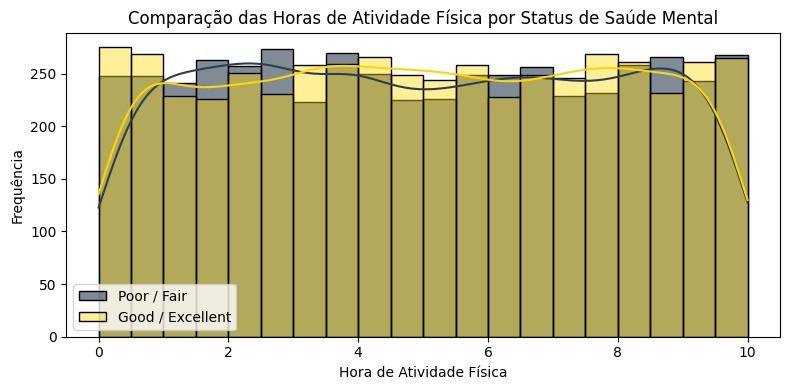

In [ ]:
plt.figure(figsize=(8, 4))

# Dados filtrados por grupo
grupo_baixo = df[df['Mental_Health_Status'].isin(['Poor', 'Fair'])]['Physical_Activity_Hours']
grupo_alto = df[df['Mental_Health_Status'].isin(['Good', 'Excellent'])]['Physical_Activity_Hours']

# Plot dos dois histogramas
sns.histplot(grupo_baixo, kde=True, color='#2C3E50', label='Poor / Fair', stat='count', bins=20, edgecolor='black', alpha=0.6)
sns.histplot(grupo_alto, kde=True, color='gold', label='Good / Excellent', stat='count', bins=20, edgecolor='black', alpha=0.4)

plt.title('Comparação das Horas de Atividade Física por Status de Saúde Mental')
plt.xlabel('Hora de Atividade Física')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

Com base na comparação da variável `Physical_Activity_Hours` entre os grupos com diferentes níveis de saúde mental, observa-se que as distribuições são novamente bastante similares. Ambos os grupos apresentam uma variação bem distribuída nas horas de atividade física, com frequência relativamente constante entre 1 e 10 horas por dia. A curva de densidade para o grupo Good/Excellent mostra uma leve tendência de maior concentração em faixas entre 3 e 5 horas, enquanto o grupo Poor/Fair mantém uma distribuição um pouco mais uniforme. Apesar dessa leve diferença, o gráfico indica que tanto indivíduos com saúde mental positiva quanto os com saúde mental fragilizada praticam níveis variados de atividade física, o que sugere que a quantidade de exercício, assim como o sono e o tempo de tela, não se apresenta como um fator isolado fortemente associado ao bem-estar psicológico nesta base de dados. É possível que o impacto da atividade física na saúde mental dependa mais da constância, intensidade ou motivação da prática do que apenas da quantidade de horas dedicadas.

Para complementar a análise visual do histograma e obter uma visão mais precisa da forma da distribuição, vamos calcular as métricas estatísticas de assimetria (skewness) e curtose (kurtosis).

In [ ]:
# Filtrar os dois grupos
grupo_baixo = df[df['Mental_Health_Status'].isin(['Poor', 'Fair'])]['Physical_Activity_Hours']
grupo_alto = df[df['Mental_Health_Status'].isin(['Good', 'Excellent'])]['Physical_Activity_Hours']

# Calcular skewness e kurtosis para cada grupo
skew_baixo = skew(grupo_baixo)
kurt_baixo = kurtosis(grupo_baixo)

skew_alto = skew(grupo_alto)
kurt_alto = kurtosis(grupo_alto)

# Exibir os resultados
print("Grupo: Poor / Fair")
print(f"  Skewness: {skew_baixo:.4f}")
print(f"  Kurtosis: {kurt_baixo:.4f}")

print("\nGrupo: Good / Excellent")
print(f"  Skewness: {skew_alto:.4f}")
print(f"  Kurtosis: {kurt_alto:.4f}")

Grupo: Poor / Fair
  Skewness: 0.0128
  Kurtosis: -1.2241

Grupo: Good / Excellent
  Skewness: -0.0114
  Kurtosis: -1.1981


Os valores de skewness e kurtosis para a variável `Physical_Activity_Hours` reforçam a conclusão visual do histograma. A assimetria foi praticamente nula para ambos os grupos, o que indica que as distribuições são simétricas, sem caudas mais acentuadas para nenhum dos lados. Já os valores de kurtosis, ambos negativos, indicam que as distribuições são mais achatadas do que uma distribuição normal, com os dados mais espalhados e menos concentrados ao redor da média. Esses resultados confirmam que a prática de atividade física se distribui de maneira muito semelhante entre os dois grupos, sem variações significativas na forma dos dados. Assim como ocorreu com as variáveis anteriores, a quantidade de horas de atividade física, isoladamente, não se mostrou um diferencial estatístico relevante entre os níveis de saúde mental

### Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('Mental_Health_Status').describe()

Age                                                \
                       count       mean        std   min   25%   50%   75%   
Mental_Health_Status                                                         
Excellent             2518.0  41.551231  13.863471  18.0  30.0  42.0  53.0   
Fair                  2490.0  42.006827  14.036469  18.0  29.0  42.0  54.0   
Good                  2508.0  41.237241  13.875046  18.0  29.0  41.0  53.0   
Poor                  2484.0  41.280193  13.900993  18.0  29.0  41.0  54.0   

                           Technology_Usage_Hours            ... Sleep_Hours  \
                       max                  count      mean  ...         75%   
Mental_Health_Status                                         ...               
Excellent             65.0                 2518.0  6.438995  ...        7.75   
Fair                  65.0                 2490.0  6.352145  ...        7.75   
Good                  65.0                 2508.0  6.536304  ...        7.73   
Poor                  65.0                 2484.0  6.570101  ...        7.80   

                          Physical_Activity_Hours                            \
                      max                   count      mean       std   min   
Mental_Health_Status                                                          
Excellent             9.0                  2518.0  5.054631  2.890783  0.00   
Fair                  9.0                  2490.0  4.977277  2.934293  0.00   
Good                  9.0                  2508.0  4.964613  2.918785  0.01   
Poor                  9.0                  2484.0  5.018667  2.876830  0.00   

                                                  
                         25%   50%     75%   max  
Mental_Health_Status                              
Excellent             2.5500  5.07  7.5400  10.0  
Fair                  2.3800  4.96  7.6100  10.0  
Good                  2.4575  4.94  7.5400  10.0  
Poor                  2.5375  4.99  7.4725  10.0  

[4 rows x 56 columns]

#### *Tempo de Tela* por Status de Saúde Mental


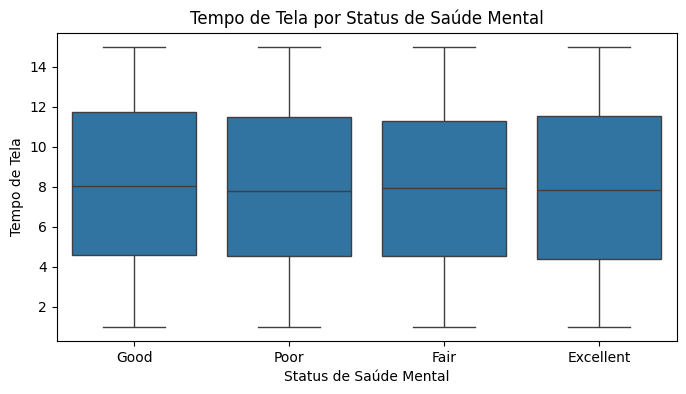

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Mental_Health_Status', y='Screen_Time_Hours', data=df)
plt.title('Tempo de Tela por Status de Saúde Mental')
plt.xlabel('Status de Saúde Mental')
plt.ylabel('Tempo de Tela')
plt.show()

Em todos os grupos, a mediana do tempo de tela gira em torno de 8 horas por dia, com intervalos interquartis e amplitudes máximas muito próximas. Isso indica que o tempo de tela, isoladamente, não demonstra variações significativas entre os diferentes níveis de saúde mental, e portanto, não se mostra um fator discriminante ou associado de forma clara ao bem-estar psicológico dos indivíduos analisados.

#### *Tempo de Atividade Física* por Status de Saúde Mental

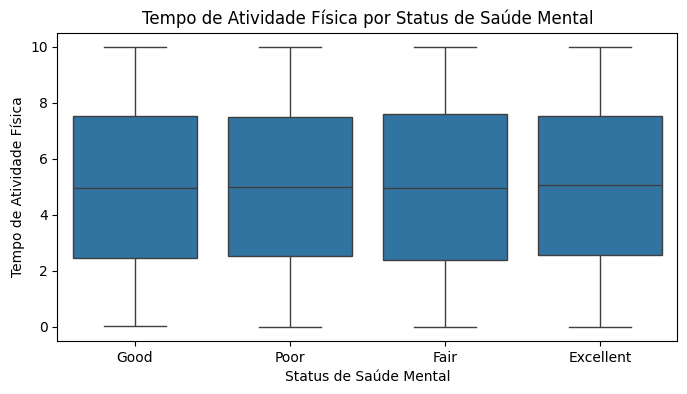

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Mental_Health_Status', y='Physical_Activity_Hours', data=df)
plt.title('Tempo de Atividade Física por Status de Saúde Mental')
plt.xlabel('Status de Saúde Mental')
plt.ylabel('Tempo de Atividade Física')
plt.show()

Em todos os grupos, a mediana do tempo de atividade física gira em torno de 5 horas por dia, com intervalos interquartis e amplitudes máximas muito próximas. Isso indica que o tempo de atividade física, isoladamente, não demonstra variações significativas entre os diferentes níveis de saúde mental, e portanto, não se mostra um fator discriminante ou associado de forma clara ao bem-estar psicológico dos indivíduos analisados.

### Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Selecionar apenas colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = df_numerico.corr()

# Exibir a matriz
print("\nMatriz de Correlação:")
print(correlation_matrix.round(2))



Matriz de Correlação:
                           Age  Technology_Usage_Hours  \
Age                       1.00                    0.02   
Technology_Usage_Hours    0.02                    1.00   
Social_Media_Usage_Hours  0.01                    0.02   
Gaming_Hours              0.01                    0.01   
Screen_Time_Hours         0.01                    0.01   
Sleep_Hours              -0.00                   -0.01   
Physical_Activity_Hours  -0.00                    0.01   

                          Social_Media_Usage_Hours  Gaming_Hours  \
Age                                           0.01          0.01   
Technology_Usage_Hours                        0.02          0.01   
Social_Media_Usage_Hours                      1.00          0.01   
Gaming_Hours                                  0.01          1.00   
Screen_Time_Hours                            -0.01         -0.01   
Sleep_Hours                                   0.00          0.01   
Physical_Activity_Hours             

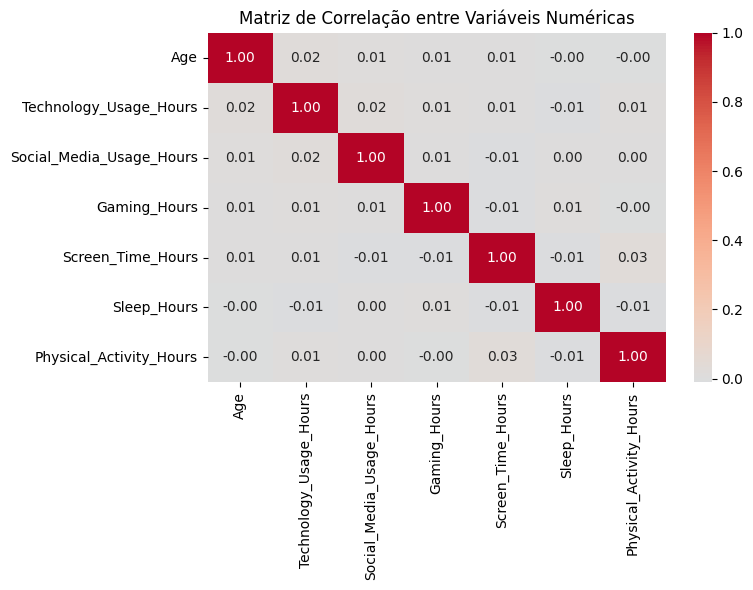

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

O mapa de calor mostra a correlação entre as variáveis numéricas do dataset. As correlações são todas muito próximas de zero, indicando que não há relação linear significativa entre os comportamentos digitais e os hábitos de vida analisados.

Por exemplo, variáveis como `Technology_Usage_Hours`, `Social_Media_Usage_Hours` e `Gaming_Hours` apresentam correlação muito fraca entre si. Isso indica que o uso intensivo de uma tecnologia específica não implica, necessariamente, em maior ou menor uso de outra. Em outras palavras, alguém que joga muito não necessariamente usa redes sociais por mais tempo, e vice-versa.

Outro ponto relevante é a ausência de correlação entre `Screen_Time_Hours` e outras variáveis como `Sleep_Hours` e `Physical_Activity_Hours`. Isso sugere que o tempo total de exposição a telas não está linearmente associado à redução de sono ou à prática de atividades físicas, ao menos dentro da estrutura dos dados fornecidos.

A variável `Age` também não apresenta correlação significativa com nenhuma das demais. Isso aponta que os padrões de comportamento são bastante consistentes entre as diferentes faixas etárias, não havendo evidência de que esses hábitos mudem linearmente com a idade.

Em resumo, a matriz de correlação revela um conjunto de dados bastante equilibrado e com variáveis aparentemente independentes entre si do ponto de vista linear.

### Dispersão PCA

Nesta etapa, utilizamos a técnica de Análise de Componentes Principais (PCA) para reduzir a dimensionalidade do conjunto de dados e explorar possíveis padrões ocultos entre os indivíduos, com foco especial na variável `Mental_Health_Status`.

Além das variáveis numéricas relacionadas ao estilo de vida (como uso de tecnologia, sono, atividade física e tempo de tela), também incluímos variáveis categóricas codificadas (`Support_Systems_Access` e `Online_Support_Usage`) para verificar se essas dimensões ajudam a distinguir grupos de saúde mental.

O gráfico de dispersão abaixo mostra os indivíduos projetados em duas dimensões (PC1 e PC2), coloridos de acordo com seu status de saúde mental. O objetivo é identificar se existem agrupamentos visuais ou separações naturais entre os diferentes perfis de saúde mental com base no estilo de vida e fatores de suporte.

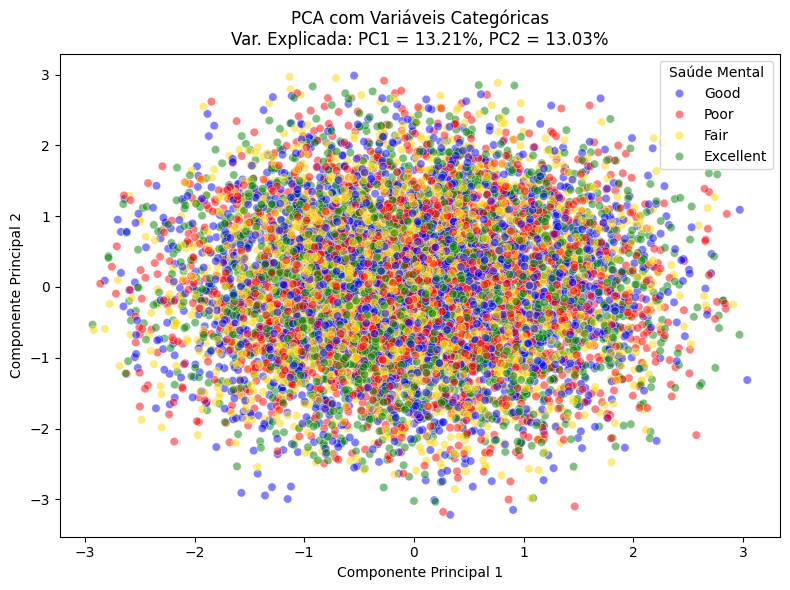

In [ ]:
# Variáveis numéricas
numeric_features = [
    'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours',
    'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours'
]

# Variáveis categóricas a serem codificadas
categorical_features = [
    'Support_Systems_Access', 'Online_Support_Usage'
]

#Paleta de cores
custom_palette = {
    'Excellent': 'green',
    'Good': 'blue',
    'Fair': 'gold',
    'Poor': 'red'
}

# One-hot encoding para as variáveis categóricas
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

# Combinar variáveis numéricas com as codificadas
X = pd.concat([df[numeric_features], df_encoded], axis=1)

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Criar DataFrame com os resultados
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Mental_Health_Status'] = df['Mental_Health_Status']

# Variância explicada
explained_variance = pca.explained_variance_ratio_

# Gráfico de dispersão com hue por saúde mental
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Mental_Health_Status', palette=custom_palette, alpha=0.5)
plt.title(f'PCA com Variáveis Categóricas\nVar. Explicada: PC1 = {explained_variance[0]:.2%}, PC2 = {explained_variance[1]:.2%}')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Saúde Mental')
plt.tight_layout()
plt.show()

A partir do gráfico de dispersão gerado pela Análise de Componentes Principais (PCA), observamos que os diferentes grupos de saúde mental (`Mental_Health_Status`) estão amplamente distribuídos e sobrepostos no plano formado pelos dois primeiros componentes principais (PC1 e PC2).

Visualmente, não há separações claras entre os grupos. As cores se misturam ao longo de todo o gráfico, sem formar agrupamentos distintos ou regiões dominadas por uma única categoria. Isso indica que, com base nas variáveis analisadas, não é possível identificar padrões evidentes que diferenciem os grupos de saúde mental de forma linear. Além disso, os dois primeiros componentes principais explicam juntos apenas cerca de 26% da variância total dos dados, o que reforça a ideia de que a estrutura multivariada do conjunto é complexa e distribuída em muitas dimensões.

Portanto, os resultados apontam que os dados analisados possuem uma estrutura equilibrada e altamente dispersa, sem indícios de separação linear.

### Clusterização

Para identificar padrões ocultos de comportamento e estilo de vida entre os participantes, aplicamos uma análise de clusterização usando o algoritmo KMeans. Essa técnica agrupa os indivíduos com base em semelhanças entre variáveis numéricas e categóricas, como uso de tecnologia, sono, atividade física e suporte social.

Antes da clusterização, os dados foram padronizados e reduzidos em duas dimensões com PCA, permitindo visualizar os grupos formados em um gráfico de dispersão. O objetivo é descobrir perfis distintos de participantes, sem depender previamente da variável de saúde mental.

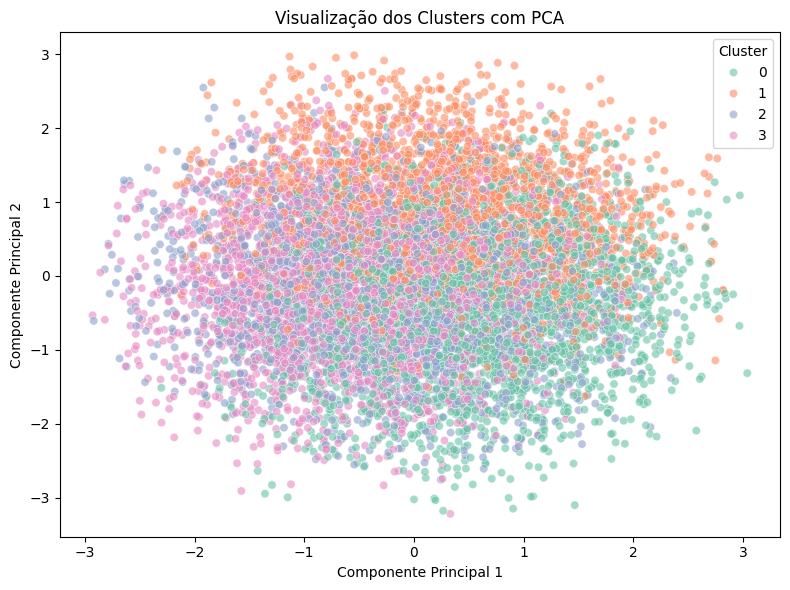

In [ ]:
# 1. Selecionar variáveis numéricas + dummies de categóricas
numeric_features = [
    'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours',
    'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours'
]
categorical_features = ['Support_Systems_Access', 'Online_Support_Usage']
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
X = pd.concat([df[numeric_features], df_encoded], axis=1)

# 2. Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Adicionar o cluster ao dataframe
df['Cluster'] = clusters

# 5. Reduzir para 2D com PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# 6. Visualização
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.6)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


O gráfico acima mostra a visualização dos clusters formados pelo algoritmo KMeans, projetados em duas dimensões por meio da técnica de Análise de Componentes Principais (PCA). Cada ponto representa um indivíduo do dataset, e as cores indicam a qual cluster esse indivíduo foi atribuído.

O PCA foi utilizado aqui apenas para reduzir a dimensionalidade dos dados e permitir a visualização. Ele condensa as múltiplas variáveis numéricas e categóricas (padronizadas) em dois eixos principais: Componente Principal 1 (PC1) e Componente Principal 2 (PC2), que capturam a maior parte da variância nos dados.

Apesar da sobreposição visual entre os grupos, o que indica que os perfis de estilo de vida são em grande parte semelhantes ou contínuos, ainda é possível observar zonas de densidade diferentes entre os clusters. Isso mostra que, embora os dados não formem divisões nítidas, o algoritmo conseguiu identificar agrupamentos com perfis estatisticamente distintos.

In [ ]:
# Criar a tabela de perfis médios por cluster
df_cluster = df[numeric_features + categorical_features + ['Cluster']].copy()

# Mapear as variáveis categóricas para 0 e 1
df_cluster['Support_Systems_Access'] = df_cluster['Support_Systems_Access'].map({'Yes': 1, 'No': 0})
df_cluster['Online_Support_Usage'] = df_cluster['Online_Support_Usage'].map({'Yes': 1, 'No': 0})

# Calcular a média por cluster
cluster_summary = df_cluster.groupby('Cluster').mean().round(2)

# Exibir a tabela
display(cluster_summary)


,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Online_Support_Usage
Cluster,,,,,,,,
0,6.75,3.89,2.48,8.13,5.37,5.11,1.00,0.51
1,9.57,4.38,2.65,8.12,7.76,5.01,0.41,0.43
2,3.65,3.73,2.43,7.79,7.87,4.99,0.62,0.49
3,6.08,3.92,2.51,7.87,5.45,4.92,0.00,0.55


A tabela de médias apresenta os perfis comportamentais médios de cada cluster dentre as variáveis. Abaixo estão as principais características observadas em cada grupo:



*   **Cluster 0:**
Este grupo apresenta pessoas com equilíbrio entre uso de tecnologia e atividade física, porém com sono comprometido. Alto acesso a sistemas de apoio pode indicar boa estrutura de suporte. de autocuidado.
*   **Cluster 1:**
Usuários intensivos de tecnologia, mas com hábitos saudáveis (sono e atividade física em bom nível). Podem se apoiar menos em sistemas formais de suporte.
* **Cluster 2:**
Usuários com estilo de vida equilibrado, baixo uso de tecnologia e bons hábitos de saúde. Parecem ter acesso adequado ao suporte.
* **Cluster 3:**
Usuários com padrões tecnológicos moderados, mas sem acesso a suporte formal. O sono e a atividade física estão abaixo do ideal. Pode haver risco de negligência em saúde mental.



In [ ]:
pd.crosstab(df['Cluster'], df['Mental_Health_Status'], normalize='index').round(3) * 100

Mental_Health_Status,Excellent,Fair,Good,Poor
Cluster,,,,
0,24.5,23.6,25.9,26.0
1,24.4,25.0,25.4,25.2
2,26.1,25.7,23.6,24.6
3,25.7,25.4,25.3,23.6


Após a criação de clusters com base em variáveis de estilo de vida, verificou-se que a distribuição dos estados de saúde mental entre os grupos foi bastante uniforme, com todas as categorias aparecendo em proporções muito próximas.

Isso indica que, com os dados disponíveis, não foi possível identificar uma relação clara entre estilo de vida e saúde mental. O resultado pode estar relacionado ao equilíbrio do dataset ou à ausência de variáveis mais sensíveis para capturar essas diferenças.

Ainda assim, a clusterização foi útil para validar que os perfis comportamentais presentes não se associam diretamente à saúde mental autodeclarada neste caso.

## Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('Mental_Health_Status', axis=1)
y = df['Mental_Health_Status']

In [ ]:
# Dividir os dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Print das divisões entre treino  teste
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (7000, 14)
Dimensões de X_test: (3000, 14)
Dimensões de y_train: (7000,)
Dimensões de y_test: (3000,)


### Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Selecionar apenas as colunas numéricas
colunas_numericas = ['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours',
                     'Gaming_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours']

# Ajustar o scaler apenas nas colunas numéricas do X_train
scaler_norm.fit(X_train[colunas_numericas])

# Transformar os dados de treino e teste
X_train[colunas_numericas] = scaler_norm.transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler_norm.transform(X_test[colunas_numericas])

In [ ]:
# Exibir as primeiras linhas dos dados normalizados
X_train.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage,Cluster
2171,USER-02172,0.957447,Other,0.039091,0.11500,0.890,0.962857,High,0.430,0.340,Yes,Negative,Yes,2
4458,USER-04459,0.425532,Other,0.842727,0.27750,0.780,0.003571,Low,0.664,0.320,No,Positive,No,1
7252,USER-07253,0.765957,Female,0.312727,0.11625,0.196,0.870000,Low,0.990,0.965,No,Positive,No,2
3549,USER-03550,0.170213,Male,0.162727,0.21500,0.686,0.299286,Medium,0.450,0.026,Yes,Neutral,No,2
9365,USER-09366,0.255319,Other,0.170000,0.61000,0.028,0.343571,High,0.840,0.139,Yes,Neutral,No,2


In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(X_train.head())


Primeiras 5 linhas dos dados normalizados (treino):
         User_ID       Age  Gender  Technology_Usage_Hours  \
2171  USER-02172  0.957447   Other                0.039091   
4458  USER-04459  0.425532   Other                0.842727   
7252  USER-07253  0.765957  Female                0.312727   
3549  USER-03550  0.170213    Male                0.162727   
9365  USER-09366  0.255319   Other                0.170000   

      Social_Media_Usage_Hours  Gaming_Hours  Screen_Time_Hours Stress_Level  \
2171                   0.11500         0.890           0.962857         High   
4458                   0.27750         0.780           0.003571          Low   
7252                   0.11625         0.196           0.870000          Low   
3549                   0.21500         0.686           0.299286       Medium   
9365                   0.61000         0.028           0.343571         High   

      Sleep_Hours  Physical_Activity_Hours Support_Systems_Access  \
2171        0.430       

Após a normalização dos dados, será feita a visualização da distribuição das variáveis numéricas separadas por grupo de saúde mental. O objetivo é verificar se, mesmo após o ajuste de escala, permanecem visíveis as diferenças entre os grupos Poor/Fair e Good/Excellent em relação às principais características analisadas. Para isso, serão construídos histogramas comparativos, destacando cada grupo com cores distintas.

#### Normalização Sleep_Hours

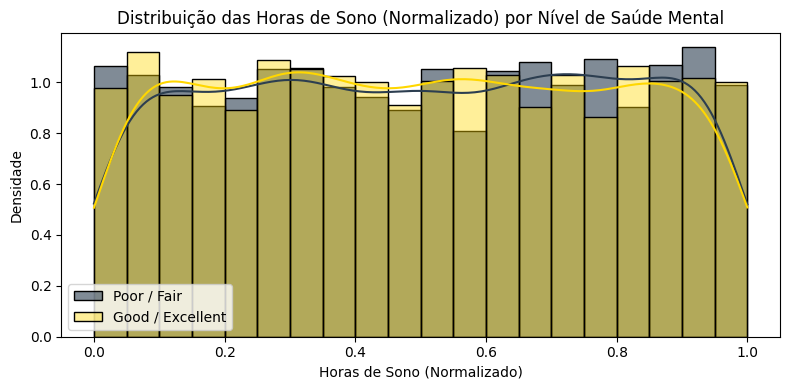

In [ ]:
plt.figure(figsize=(8, 4))

# Dados para cada grupo
grupo_baixo = X_train[y_train.isin(['Poor', 'Fair'])]['Sleep_Hours']
grupo_alto = X_train[y_train.isin(['Good', 'Excellent'])]['Sleep_Hours']

# Plot dos dois histogramas
sns.histplot(grupo_baixo, kde=True, color='#2C3E50', label='Poor / Fair', stat='density', bins=20, edgecolor='black', alpha=0.6)
sns.histplot(grupo_alto, kde=True, color='gold', label='Good / Excellent', stat='density', bins=20, edgecolor='black', alpha=0.4)

plt.title('Distribuição das Horas de Sono (Normalizado) por Nível de Saúde Mental')
plt.xlabel('Horas de Sono (Normalizado)')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()

A normalização alterou apenas a escala dos valores, ajustando os dados para o intervalo entre 0 e 1, como podemos ver no eixo x do gráfico pós-normalização. No entanto, os padrões de densidade, a dispersão entre os grupos e a relação entre as curvas KDE dos dois grupos permanecem inalterados.

Essa estabilidade na forma da distribuição é importante, pois indica que a normalização não distorceu o comportamento original dos dados, apenas os colocou em uma escala adequada para algoritmos de machine learning que são sensíveis a magnitudes diferentes entre as variáveis.

#### Normalização Screen_Time_Hours

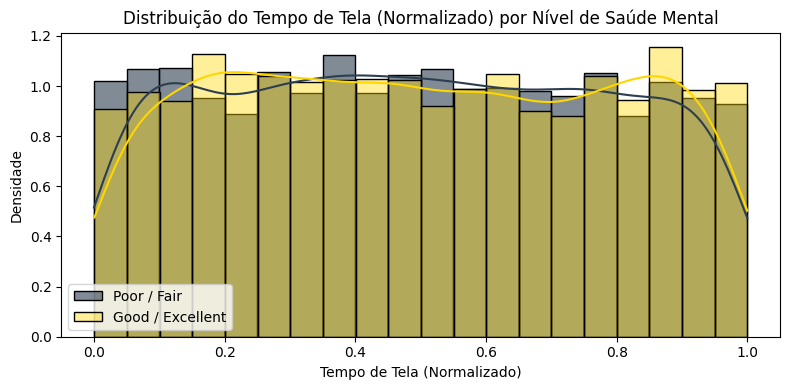

In [ ]:
plt.figure(figsize=(8, 4))

# Dados para cada grupo
grupo_baixo = X_train[y_train.isin(['Poor', 'Fair'])]['Screen_Time_Hours']
grupo_alto = X_train[y_train.isin(['Good', 'Excellent'])]['Screen_Time_Hours']

# Plot dos dois histogramas
sns.histplot(grupo_baixo, kde=True, color='#2C3E50', label='Poor / Fair', stat='density', bins=20, edgecolor='black', alpha=0.6)
sns.histplot(grupo_alto, kde=True, color='gold', label='Good / Excellent', stat='density', bins=20, edgecolor='black', alpha=0.4)

plt.title('Distribuição do Tempo de Tela (Normalizado) por Nível de Saúde Mental')
plt.xlabel('Tempo de Tela (Normalizado)')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()

Visualmente, tanto antes quanto depois da normalização, os dois grupos de saúde mental mantêm distribuições muito próximas, com ligeiras variações ao longo das faixas de tempo de tela. Ambos apresentam um padrão relativamente uniforme, o que reforça a constatação de que a quantidade de tempo de tela, por si só, não apresenta diferenças expressivas entre os grupos.

Assim como ocorreu na análise das horas de sono, a normalização garantiu que o modelo de machine learning possa trabalhar com todas as variáveis na mesma escala, sem alterar a distribuição original dos dados, mantendo a integridade das informações para as próximas etapas da modelagem.

#### Normalização Physical_Activity_Hours

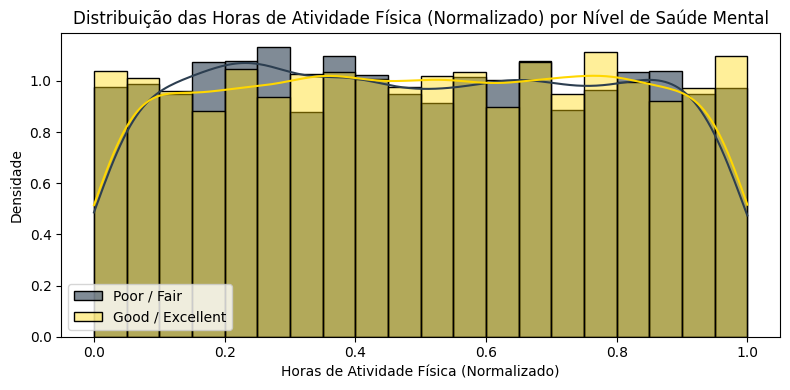

In [ ]:
plt.figure(figsize=(8, 4))

# Dados para cada grupo
grupo_baixo = X_train[y_train.isin(['Poor', 'Fair'])]['Physical_Activity_Hours']
grupo_alto = X_train[y_train.isin(['Good', 'Excellent'])]['Physical_Activity_Hours']

# Plot dos dois histogramas
sns.histplot(grupo_baixo, kde=True, color='#2C3E50', label='Poor / Fair', stat='density', bins=20, edgecolor='black', alpha=0.6)
sns.histplot(grupo_alto, kde=True, color='gold', label='Good / Excellent', stat='density', bins=20, edgecolor='black', alpha=0.4)

plt.title('Distribuição das Horas de Atividade Física (Normalizado) por Nível de Saúde Mental')
plt.xlabel('Horas de Atividade Física (Normalizado)')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()

Analisando as distribuições de `Physical_Activity_Hours` antes e depois da normalização, percebe-se novamente que a forma geral das distribuições permanece a mesma, conforme esperado após o uso do MinMaxScaler. A transformação ajustou apenas a escala dos dados, sem alterar o padrão de densidade ou a relação entre os grupos.

Assim como nas variáveis anteriores, a normalização garantiu que todas as características numéricas estejam agora na mesma escala, facilitando o trabalho dos algoritmos de machine learning nas próximas etapas, sem comprometer a integridade estatística dos dados.

### Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão apenas nas colunas numéricas do treino
scaler_std.fit(X_train[colunas_numericas])

# Padroniza apenas as colunas numéricas de treino e teste
X_train[colunas_numericas] = scaler_std.transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler_std.transform(X_test[colunas_numericas])

In [ ]:
# Exibir as primeiras linhas dos dados padronizados
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(X_train.head())


Primeiras 5 linhas dos dados padronizados (treino):
         User_ID       Age  Gender  Technology_Usage_Hours  \
2171  USER-02172  1.541335   Other               -1.593956   
4458  USER-04459 -0.253407   Other                1.200037   
7252  USER-07253  0.895228  Female               -0.642607   
3549  USER-03550 -1.114884    Male               -1.164111   
9365  USER-09366 -0.827725   Other               -1.138826   

      Social_Media_Usage_Hours  Gaming_Hours  Screen_Time_Hours Stress_Level  \
2171                 -1.327731      1.337261           1.617380         High   
4458                 -0.763480      0.957816          -1.715476          Low   
7252                 -1.323391     -1.056693           1.294766          Low   
3549                 -0.980500      0.633563          -0.688073       Medium   
9365                  0.391063     -1.636209          -0.534210         High   

      Sleep_Hours  Physical_Activity_Hours Support_Systems_Access  \
2171    -0.243478       

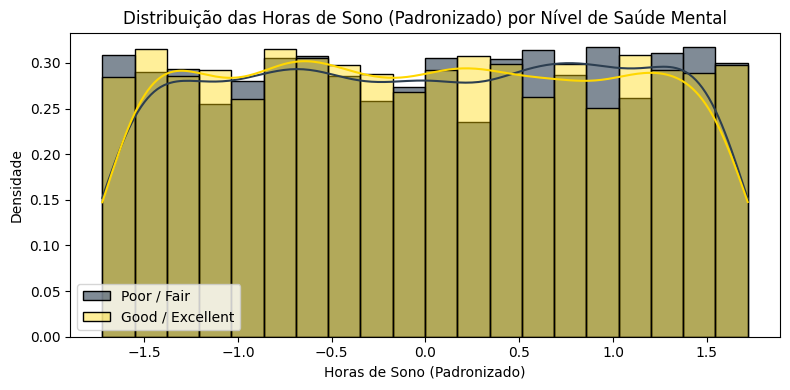

In [ ]:
plt.figure(figsize=(8, 4))

# Filtrar os dois grupos já dentro do X_train padronizado
grupo_baixo = X_train[y_train.isin(['Poor', 'Fair'])]['Sleep_Hours']
grupo_alto = X_train[y_train.isin(['Good', 'Excellent'])]['Sleep_Hours']

# Plot dos dois histogramas sobrepostos
sns.histplot(grupo_baixo, kde=True, color='#2C3E50', label='Poor / Fair', stat='density', bins=20, edgecolor='black', alpha=0.6)
sns.histplot(grupo_alto, kde=True, color='gold', label='Good / Excellent', stat='density', bins=20, edgecolor='black', alpha=0.4)

plt.title('Distribuição das Horas de Sono (Padronizado) por Nível de Saúde Mental')
plt.xlabel('Horas de Sono (Padronizado)')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()

Ao analisar a distribuição das horas de sono após a aplicação da padronização, observa-se que os dados agora estão centrados em torno de zero, com a maior parte das observações concentradas entre -1,5 e 1,5 desvios padrão.

Visualmente, as curvas de densidade para os dois grupos de saúde mental continuam bastante próximas, mantendo o padrão já identificado nas análises anteriores. A sobreposição das distribuições indica que a transformação da escala numérica dos dados não alterou a relação entre os grupos, apenas ajustou os valores para uma média zero e desvio padrão um.

### Tratamento de Valores Nulos

O dataset original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Mental Health & Technology Usage Dataset:")
df.isnull().sum()

Valores nulos no dataset Mental Health & Technology Usage Dataset:


,0
User_ID,0
Age,0
Gender,0
Technology_Usage_Hours,0
Social_Media_Usage_Hours,0
Gaming_Hours,0
Screen_Time_Hours,0
Mental_Health_Status,0
Stress_Level,0
Sleep_Hours,0


## Conclusão

Ao longo deste projeto, buscamos entender como diferentes aspectos do estilo de vida, como horas de sono, prática de atividade física, tempo de exposição a telas e uso de redes sociais, podem estar relacionados ao estado de saúde mental dos indivíduos. Através de uma análise exploratória detalhada, foi possível observar que as variáveis analisadas apresentam distribuições relativamente equilibradas entre os diferentes grupos de saúde mental, com poucos indícios de diferenças significativas quando observadas de forma isolada.

Tanto na análise de horas de sono quanto no tempo de tela e nas horas de atividade física, os resultados apontaram que não há um padrão claro ou uma variável única que, por si só, explique as diferenças nos níveis de saúde mental dos participantes. As distribuições entre os grupos de saúde mental foram bastante semelhantes em todas as variáveis avaliadas, tanto antes quanto depois dos processos de normalização e padronização.

Mesmo com um dataset aparentemente equilibrado, os resultados refletem a realidade: o mesmo comportamento pode ter impactos distintos em pessoas diferentes. Por exemplo, indivíduos com poucas horas de sono podem se sentir estressados pela privação de descanso, enquanto outros podem enxergar isso como uma forma positiva de aproveitar melhor o dia. Da mesma forma, o alto tempo de tela pode representar excesso de trabalho para alguns, mas lazer e socialização para outros.

Essa análise reforça que a saúde mental é um fenômeno multifatorial, complexo e extremamente individualizado. Não é possível estabelecer uma relação direta e universal entre um único hábito de vida e o bem-estar psicológico. Provavelmente, é a combinação de vários fatores, junto com o contexto emocional e social de cada indivíduo, que realmente influencia o estado mental.

Análise das Hipóteses:

* Pessoas que dormem menos horas por dia tendem a apresentar pior estado de saúde mental?
      Não foi possível identificar uma relação clara. As distribuições de sono foram semelhantes entre os grupos.

* Níveis mais elevados de atividade física diária estão associados a melhores condições de saúde mental?
      Não houve diferença significativa entre os grupos. Os níveis de atividade física foram bem distribuídos.

* Indivíduos com maior uso diário de redes sociais apresentam níveis mais altos de estresse?
      Essa relação não foi analisada diretamente nesta etapa, mas os histogramas de uso de tecnologia não indicaram diferenças claras entre os grupos.

*  A combinação de poucas horas de sono e baixa atividade física agrava negativamente a saúde mental?
        Não foi possível confirmar essa hipótese com os dados disponíveis. Os grupos apresentaram padrões semelhantes.

* Altas horas de tempo de tela estão associadas a menor qualidade de sono e aumento do estresse?
      Também não foi identificado um padrão claro. As distribuições de tempo de tela e sono não mostraram relação evidente entre si.
